# K-Nearest Neighbor Lab





In [109]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import random

## 1. (40%) Correctly implement the k-nearest neighbor (KNN) algorithm and the KNN regression algorithm

### Code requirements
- Use Euclidean distance to decide closest neighbors. 
- Include optional distance weighting for both algorithms


In [ ]:
class KNNClassifier(BaseEstimator,ClassifierMixin):
    data = []
    labels = []
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.data = []
        self.labels = []
        self.K = 3 # default set to 3
        self.columntype = columntype # Note This won't be needed until part 5
        self.weight_type = weight_type
        self.isClassification = True # default is classification
        self.isWeighted = True # default is true

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.data = data
        self.labels = labels
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        # The KNN Algorithm
        # For each example in the data
        distances_indices = []
        for inc in range(len(self.data)):
            sum = 0
            for item in range(len(data)):
                # Calculate the distance between the query example and 
                # the current example from the data.
                # print('self.data[inc]: ', self.data[inc])
                # print('data: ', data)
                # print('item: ', item)
                sum += np.abs(self.data[inc][item] - data[item])
            # Add the distance and the index of the example to an ordered collection
            distances_indices.append([sum, inc])
        
        # Sort the ordered collection of distances and indices from 
        # smallest to largest (in ascending order) by the distances
        # print('pre-sort: ', distances_indices)
        distances_indices = sorted(distances_indices, key=lambda x: x[0])
        # print('post-sort: ', distances_indices)

        final_selection = []
        # Pick the first K entries from the sorted collection
        for i in range(self.K):
            final_selection.append(distances_indices[i])
        
        final_labels = []
        # Get the labels of the selected K entries
        # --------------------------- NEED TO FIX THIS SECTION -------------------------
        res = None
        avg = 0
        if self.isWeighted:
            for selection in final_selection:
                if not self.isClassification:
                    if selection[0] != 0:
                        print('selection: ', selection[0])
                        avg += (self.labels[selection[1]]) / ((selection[0])**2)
                    else:
                        avg += 0
                else:
                    avg += 0
                final_labels.append(self.labels[selection[1]])
            
            myset = set()
            # check to see how many different tags there are
            if not self.isClassification:
                divideBy = 0
            for label in final_labels:
                if not self.isClassification:
                    divideBy += label
                myset.add(label)
            
            if not self.isClassification:
                avg /= divideBy
            return_values = []
            while(len(myset) > 0):
                currLabel = myset.pop()
                sum = 0
                for selection in final_selection:
                    # if the labels match
                    # mse = self.labels[selection[1]] / 
                    if self.labels[selection[1]] == currLabel:
                        # sum the weighted output
                        if selection[0] != 0:
                            sum += 1/selection[0]**2
                        else:
                            sum += 0
                return_values.append([sum, currLabel])
            return_values = sorted(return_values, key=lambda x: x[0])
            # return the one that is the highest
            if self.isClassification:
                return return_values[len(return_values) - 1][1]
            else:
                return avg
            # FIXME not sure what to do for regression?
        
        else:
            for selection in final_selection:
                final_labels.append(self.labels[selection[1]])
            # --------------------------- NEED TO FIX THIS SECTION -------------------------
            # If regression, return the mean of the K labels
            res = max(set(final_labels), key = final_labels.count)
            sum = 0
            count = 0
            for selection in final_selection:
                if selection[1] == res:
                    count += 1
                    sum += selection[0]
            
            if count != 0:
                avg = sum / count
            

        # If classification, return the mode of the K labels
        # res = max(set(final_labels), key = final_labels.count)

        # print(res)
        if self.isClassification:
            return res
        else:
            return avg

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = []
        for x in X:
            predictions.append(self.predict(x))

        sum = 0
        mse = 0
        for inc in range(len(predictions)):
            mse = (y[inc] - predictions[inc])**2
            if predictions[inc] == y[inc]:
                sum += 1
        mse /= len(predictions)
        sum /= len(predictions)
        if self.isClassification == True:
            return sum
        else:
            return mse

    def setK(self, kToSetTo):
        self.K = kToSetTo

    def setClassification(self, classifcationToSet):
        self.isClassification = classifcationToSet
    
    def setIsWeighted(self, weightedToSet):
        self.isWeighted = weightedToSet
    

## 1.1 Debug and Evaluation

Debug and Evaluate your model using the parameters below:

- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

---

### 1.1.1 Debug

- Use this [training set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/glass_train.arff) and this [test set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/glass_test.arff)
- Use distance weighting
- KNN = 3 (three nearest neighbors)
- Don’t normalize the data
- Use Euclidean Distance

Expected Results:
- Not using inverse weighted distancing = roughly [68.29%]
- Link to [debug solution](https://github.com/cs472ta/CS472/blob/master/debug_solutions/glass_no_inv_prediction.csv)

- Using inverse weighted distancing = roughly [74.39%]
- Link to [debug solution](https://github.com/cs472ta/CS472/blob/master/debug_solutions/glass_inv_prediction.csv)


In [8]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/glass_train.arff --output debug_data.arff
debug_data = arff.loadarff('debug_data.arff')
debug_df = pd.DataFrame(debug_data[0])

debug_df['Type'] = debug_df['Type'].str.decode('utf-8')
# debug_df.head()

debug_np = debug_df.to_numpy()
debug_training_np = debug_np.tolist()

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/glass_test.arff --output debug_data.arff
debug_data = arff.loadarff('debug_data.arff')
debug_df = pd.DataFrame(debug_data[0])

debug_df['Type'] = debug_df['Type'].str.decode('utf-8')
# debug_df.head()
debug_np = debug_df.to_numpy()
debug_test_np = debug_np.tolist()

# print(len(debug_training_np))
# print(len(debug_test_np))

X_train = []
y_train = []
for x in debug_training_np:
    X_train.append(x[0:len(x)-1])
    y_train.append(x[len(x)-1])

X_test = []
y_test = []
for x in debug_test_np:
    X_test.append(x[0:len(x)-1])
    y_test.append(x[len(x)-1])

# Load glass data

# Train on training set
model = KNNClassifier()
model.fit(X_train, y_train)

# Predict on test set
model.setIsWeighted(False)
print('Not using Inverse-Weighting: ', model.score(X_test, y_test))
model.setIsWeighted(True)
print('Using Inverse-Weighting: ', model.score(X_test, y_test))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12431  100 12431    0     0  24762      0 --:--:-- --:--:-- --:--:-- 24762
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5431  100  5431    0     0   8512      0 --:--:-- --:--:-- --:--:--  8499
Not using Inverse-Weighting:  0.7073170731707317
Using Inverse-Weighting:  0.7682926829268293


### 1.1.2 Evaluate

We will evaluate your model based on its performance on the [diabetes](https://archive.ics.uci.edu/ml/datasets/Diabetes) problem.
- Use this [training set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/diabetes_train.arff) and this [test set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/diabetes_test.arff)

In [62]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/diabetes_train.arff --output diabetes_train_data.arff
diabetes_train_data = arff.loadarff('diabetes_train_data.arff')
diabetes_train_df = pd.DataFrame(diabetes_train_data[0])
diabetes_train_df['class'] = diabetes_train_df['class'].str.decode('utf-8')
#print(diabetes_train_df.head())

diabetes_train_np = diabetes_train_df.to_numpy()
diabetes_train_np = diabetes_train_np.tolist()

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/diabetes_test.arff --output diabetes_test_data.arff
diabetes_test_data = arff.loadarff('diabetes_test_data.arff')
diabetes_test_df = pd.DataFrame(diabetes_test_data[0])
diabetes_test_df['class'] = diabetes_test_df['class'].str.decode('utf-8')
#print(diabetes_test_df.head())

diabetes_test_np = diabetes_test_df.to_numpy()
diabetes_test_np = diabetes_test_np.tolist()

X_train = []
y_train = []
for x in diabetes_train_np:
    X_train.append(x[0:len(x)-1])
    y_train.append(x[len(x)-1])

X_test = []
y_test = []
for x in diabetes_test_np:
    X_test.append(x[0:len(x)-1])
    y_test.append(x[len(x)-1])

# Load diabetes data

# Train on training set
model = KNNClassifier()
model.fit(X_train, y_train)

# Predict on test set
model.setIsWeighted(False)
print('Not using Inverse-Weighting: ', model.score(X_test, y_test))
model.setIsWeighted(True)
print('Using Inverse-Weighting: ', model.score(X_test, y_test))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37419  100 37419    0     0   103k      0 --:--:-- --:--:-- --:--:--  102k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73698  100 73698    0     0   224k      0 --:--:-- --:--:-- --:--:--  224k
Not using Inverse-Weighting:  0.8346354166666666
Using Inverse-Weighting:  0.8815104166666666


## 2. (10%) Use the k-nearest neighbor algorithm (without distance weighting) for the [magic telescope](http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) problem

- Use this [training set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/magic_telescope_train.arff) and this [test set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/magic_telescope_test.arff) 

### 2.1
- Try it with k=3 and without normalization


In [95]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/magic_telescope_train.arff --output telescope_train_data.arff
telescope_train_data = arff.loadarff('telescope_train_data.arff')
telescope_train_df = pd.DataFrame(telescope_train_data[0])
telescope_train_df['class'] = telescope_train_df['class'].str.decode('utf-8')
for col in telescope_train_df:
    if col != 'class':
        telescope_train_df[col] = telescope_train_df[col].astype(float)
#print(diabetes_train_df.head())

telescope_train_np = telescope_train_df.to_numpy()
telescope_train_np = telescope_train_np.tolist()
print(telescope_train_df.head())

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/magic_telescope_test.arff --output telescope_test_data.arff
telescope_test_data = arff.loadarff('telescope_test_data.arff')
telescope_test_df = pd.DataFrame(telescope_test_data[0])
telescope_test_df['class'] = telescope_test_df['class'].str.decode('utf-8')
for col in telescope_test_df:
    if col != 'class':
        telescope_test_df[col] = telescope_test_df[col].astype(float)

telescope_test_np = telescope_test_df.to_numpy()
telescope_test_np = telescope_test_np.tolist()
print(telescope_test_df.head())

X_train = []
y_train = []
for x in telescope_train_np:
    X_train.append(x[0:len(x)-1])
    y_train.append(x[len(x)-1])

X_test = []
y_test = []
for x in telescope_test_np:
    X_test.append(x[0:len(x)-1])
    y_test.append(x[len(x)-1])

# Load magic telescope data
# print(X_test)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  937k  100  937k    0     0  1202k      0 --:--:-- --:--:-- --:--:-- 1200k
   fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
0  22.7815  14.9526  2.4362  0.4982  0.2509 -14.2836  -9.3635   13.0939   
1  40.6756  15.5940  2.7447  0.2772  0.1449  19.6226   9.0297    7.4157   
2  12.8427  11.3821  2.1255  0.7191  0.4232 -14.9637   8.5891    6.9418   
3  77.0262  32.2880  3.3502  0.3152  0.1868 -28.6712 -35.9464  -31.4001   
4  27.5146  11.2114  2.6637  0.4643  0.2687  42.4467  33.0422   -6.3980   

    fAlpha     fDist class  
0   3.0779  141.5620     g  
1  15.4260  193.2340     g  
2  82.4198  183.9790     g  
3   0.8940  357.0440     g  
4  50.3004  239.8878     h  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   S

In [61]:
# Train/Predict without normalization
model = KNNClassifier()
model.fit(X_train, y_train)

# Predict on test set
model.setIsWeighted(False)
print('Not using Inverse-Weighting: ', model.score(X_test, y_test))
# model.setIsWeighted(True)
# print('Using Inverse-Weighting: ', model.score(X_test, y_test))

Not using Inverse-Weighting:  0.8093309330933093


### 2.2
- Try it with k=3 and with normalization (input features normalized between 0 and 1). Use the normalization formula (x-xmin)/(xmax-xmin)

In [84]:
def normalizeData(input):
    columns = []
    maxValues = []
    minValues = []

    # for the number of columns
    for item in range(len(input[0])):
        # for each row
        temp = []
        for value in range(len(input)):
            temp.append(input[value][item])

        columns.append(temp)
    
    for item in columns:
        maxValues.append(max(item))
        minValues.append(min(item))
    # print('col: ', columns)
    # print('max: ', maxValues)
    # print('min: ', minValues)
    return maxValues, minValues

print('X_train: ', X_train[0])
print('X_test: ', X_test[0])

maxValues, minValues = normalizeData(X_train)
for incX in range(len(X_train)):
    for valX in range(len(X_train[incX])):
        X_train[incX][valX] = (X_train[incX][valX] - minValues[valX]) / (maxValues[valX] - minValues[valX])

# maxValues, minValues = normalizeData(X_test)
for incX in range(len(X_test)):
    for valX in range(len(X_test[incX])):
        X_test[incX][valX] = (X_test[incX][valX] - minValues[valX]) / (maxValues[valX] - minValues[valX])

#print('max: ', maxValues)
#print('min: ', minValues)
#print('X_train: ', X_train[0])
#print('X_test: ', X_test[0])

# Train/Predict with normalization
model = KNNClassifier()
model.fit(X_train, y_train)

# Predict on test set
# model.setIsWeighted(False)
# print('Not using Inverse-Weighting: ', model.score(X_test, y_test))

X_train:  [0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334]
X_test:  [0.25656488235294117, 0.7612573467336684, 0.5961878114754099, 0.3549416868686868, 0.0008475378250591016, 0.5451267064083458, 1.8518761742100767, 0.5484687833333334]


KNNClassifier()

In [40]:
model.setIsWeighted(False)
print('Not using Inverse-Weighting: ', model.score(X_test, y_test))

Not using Inverse-Weighting:  0.8372337233723373


*Discuss the accuracy results of using normalized data vs. unnormalized data* --------- The accuracy of the normalized data vs. the unnormalized data was roughly 4% better than the unnormalized data. I could see that normalizing the data would be incredibly beneficial especially when it came to making a more robust system. Especially because test values are not going to be known.

### 2.3

- Using your normalized data, create one graph with classification accuracy on the test set over k values. 
    - Use odd values of k from 1 to 15.
- As a rough sanity check, typical knn accuracies for the magic telescope data set are 75-85%

In [57]:
# Train/Predict with normalization using k=1,3,...,15
scores = []
k_values = []
for i in range(15):
    if i % 2 == 0:
        model.setK(i+1)
        scores.append(model.score(X_test, y_test))
        print('completed: ', i+1)
        k_values.append(i+1)


completed:  1
completed:  3
completed:  5
completed:  7
completed:  9
completed:  11
completed:  13
completed:  15


[0.8172817281728173, 0.8372337233723373, 0.8453345334533453, 0.8468346834683468, 0.8471347134713472, 0.8472847284728473, 0.8496849684968497, 0.8474347434743474]
[1, 3, 5, 7, 9, 11, 13, 15]


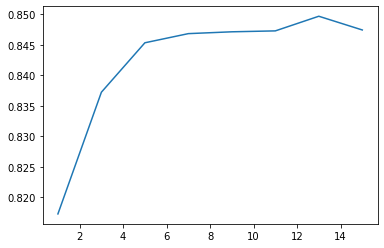

In [58]:
# Graph classification accuracy over k
print(scores)
print(k_values)
plt.plot(k_values, scores)

# For the rest of the experiments use only normalized data

## 3. (10%) Use the regression variation of your algorithm (without distance weighting) for the [housing price prediction](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) problem.

- Use this [training set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/housing_train.arff) and this [test set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/housing_test.arff).
- Use Mean Square Error (MSE) on the test set as your accuracy metric for this case.
    - Do not normalize regression output values
- Graph MSE on the test set with odd values of k from 1 to 15


In [75]:
# Load housing price prediction data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/housing_train.arff --output housing_train_data.arff
housing_train_data = arff.loadarff('housing_train_data.arff')
housing_train_df = pd.DataFrame(housing_train_data[0])
housing_train_df = housing_train_df.astype(float)
# print(housing_train_df.head())
housing_train_np = housing_train_df.to_numpy()
housing_train_np = housing_train_np.tolist()
#print(housing_train_np)

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/housing_test.arff --output housing_test_data.arff
housing_test_data = arff.loadarff('housing_test_data.arff')
housing_test_df = pd.DataFrame(housing_test_data[0])
housing_test_df = housing_test_df.astype(float)

housing_test_np = housing_test_df.to_numpy()
housing_test_np = housing_test_np.tolist()


X_train_housing = []
y_train_housing = []
for x in housing_train_np:
    X_train_housing.append(x[0:len(x)-1])
    y_train_housing.append(x[len(x)-1])

X_test_housing = []
y_test_housing = []
for x in housing_test_np:
    X_test_housing.append(x[0:len(x)-1])
    y_test_housing.append(x[len(x)-1])



maxValues, minValues = normalizeData(X_train_housing)
for incX in range(len(X_train_housing)):
    for valX in range(len(X_train_housing[incX])):
        X_train_housing[incX][valX] = (X_train_housing[incX][valX] - minValues[valX]) / (maxValues[valX] - minValues[valX])

# maxValues, minValues = normalizeData(X_test)
for incX in range(len(X_test_housing)):
    for valX in range(len(X_test_housing[incX])):
        X_test_housing[incX][valX] = (X_test_housing[incX][valX] - minValues[valX]) / (maxValues[valX] - minValues[valX])

model2 = KNNClassifier()
model2.setClassification(False)
model2.setIsWeighted(False)
model2.fit(X_train_housing, y_train_housing)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34205  100 34205    0     0   115k      0 --:--:-- --:--:-- --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3885  100  3885    0     0  13036      0 --:--:-- --:--:-- --:--:-- 13036


KNNClassifier()

In [65]:
# Train/Predict using k=1,3,...,15
scores2 = []
k_values2 = []
for i in range(15):
    if i % 2 == 0:
            model2.setK(i+1)
            scores2.append(model2.score(X_test_housing, y_test_housing))
            print('completed: ', i+1)
            k_values2.append(i+1)

completed:  1
completed:  3
completed:  5
completed:  7
completed:  9
completed:  11
completed:  13
completed:  15


[5.534117647058824, 5.534117647058824, 5.534117647058824, 5.534117647058824, 5.534117647058824, 5.534117647058824, 5.534117647058824, 5.534117647058824]
[1, 3, 5, 7, 9, 11, 13, 15]


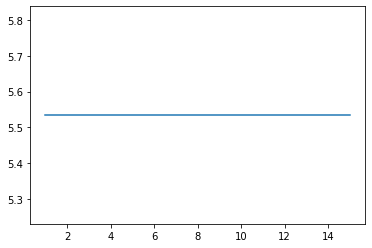

In [66]:
# Graph MSE over k
# Graph classification accuracy over k
print(scores2)
print(k_values2)
plt.plot(k_values2, scores2)

## 4. (15%) Repeat your experiments for magic telescope and housing using distance-weighted (inverse of distance squared) voting and discuss your results.


## 4.1 Magic Telescope Dataset

In [106]:
# Train/Predict magic telescope using distance-weighted voting
model3 = KNNClassifier()
model3.setClassification(True)
model3.setIsWeighted(True)
model3.fit(X_train, y_train)

KNNClassifier()

In [108]:
scores3 = []
k_values3 = []
for i in range(15):
    if i == 3 or i == 7:
            model3.setK(i+1)
            scores3.append(model3.score(X_test, y_test))
            print('completed: ', i+1)
            k_values3.append(i+1)

<ipython-input-105-3bfbdb30aad3>:101: RuntimeWarning: divide by zero encountered in double_scalars
  sum += 1/selection[0]**2


KeyboardInterrupt: 

## 4.2 Housing Dataset

In [67]:
# Train/Predict housing using distance-weighted voting
model4 = KNNClassifier()
model4.setClassification(False)
model4.setIsWeighted(True)
model4.fit(X_train_housing, y_train_housing)

KNNClassifier()

In [68]:
scores4 = []
k_values4 = []
for i in range(15):
    if i % 2 == 0:
            model4.setK(i+1)
            scores4.append(model4.score(X_test_housing, y_test_housing))
            print('completed: ', i+1)
            k_values4.append(i+1)

completed:  1
completed:  3
completed:  5
completed:  7
completed:  9
completed:  11
completed:  13
completed:  15


[3.660394501635618, 2.5939840393810325, 0.09083397722480108, 0.09398081439653426, 0.4169789254955246, 0.7504350347865282, 1.0415002391439967, 1.3080479671085947]
[1, 3, 5, 7, 9, 11, 13, 15]


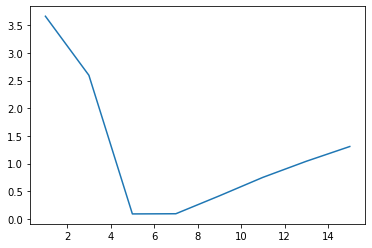

In [69]:
# Graph classification accuracy over k
print(scores4)
print(k_values4)
plt.plot(k_values4, scores4)

*Discuss your results* ------ Something that I noticed is that the model had an issue learning the regression case when weights were not involved. However, once the weights were included, the model began to learn much better. It even began to overfit I dare say.

## 5. (10%) Use the k-nearest neighbor algorithm to solve the [credit-approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval) (credit-a) problem.

- Use this [dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/credit_approval.arff)
    - Use a 70/30 split of the data for the training/test set
- Note that this set has both continuous and nominal attributes, together with don’t know values. 
- Implement and justify a distance metric which supports continuous, nominal, and don’t know attribute values
    - You need to handle don't knows with the distance metric, not by imputing a value.
    - More information on distance metrics can be found [here](https://www.jair.org/index.php/jair/article/view/10182/24168).
- Use your own choice for k.
- As a rough sanity check, typical knn accuracies for the credit data set are 70-80%.


In [ ]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/credit_approval.arff --output credit_data.arff
credit_data = arff.loadarff('credit_data.arff')
credit_df = pd.DataFrame(credit_data[0])
A1_mask = {'a':0, '?':-1, 'b':1}
A4_mask = {'l':0, '?':-1, 'u':1, 'y':2}
A5_mask = {'g':0, 'gg':1, '?':-1, 'p':2}
A6_mask = {'j':0, 'aa':1, 'w':2, 'd':3, 'c':4, 'q':5, 'i':6, 'cc':7, 'ff':8, 'r':9, 'x':10, 'k':11, 'e':12, 'm':13, '?':-1}
A7_mask = {'j':0, 'ff':1, 'bb':2, 'z':3, 'v':4, 'dd':5, 'o':6, 'h':7, 'n':8, '?':-1}
A9_10_12_mask = {'f':0, 't':1}
A13_mask = {'s':0, 'g':1, 'p':2}
class_mask = {'-':0, '+':1}

credit_df['A1'] = credit_df['A1'].str.decode('utf-8')
credit_df['A1'] = credit_df['A1'].map(A1_mask)
credit_df['A4'] = credit_df['A4'].str.decode('utf-8')
credit_df['A4'] = credit_df['A4'].map(A4_mask)
credit_df['A5'] = credit_df['A5'].str.decode('utf-8')
credit_df['A5'] = credit_df['A5'].map(A5_mask)
credit_df['A6'] = credit_df['A6'].str.decode('utf-8')
credit_df['A6'] = credit_df['A6'].map(A6_mask)
credit_df['A7'] = credit_df['A7'].str.decode('utf-8')
credit_df['A7'] = credit_df['A7'].map(A7_mask)
credit_df['A9'] = credit_df['A9'].str.decode('utf-8')
credit_df['A9'] = credit_df['A9'].map(A9_10_12_mask)
credit_df['A10'] = credit_df['A10'].str.decode('utf-8')
credit_df['A10'] = credit_df['A10'].map(A9_10_12_mask)
credit_df['A12'] = credit_df['A12'].str.decode('utf-8')
credit_df['A12'] = credit_df['A12'].map(A9_10_12_mask)
credit_df['A13'] = credit_df['A13'].str.decode('utf-8')
credit_df['A13'] = credit_df['A13'].map(A13_mask)
credit_df['class'] = credit_df['class'].str.decode('utf-8')
credit_df['class'] = credit_df['class'].map(class_mask)

credit_np = credit_df.to_numpy()
credit_np = credit_np.tolist()
#print(credit_np)

count = 0.3 * len(credit_np)
count = int(count)
print('cnt: ', count)

test_set = []
while(len(test_set) < count):
    pos = random.randint(0, len(test_set))
    test_set.append(credit_np[pos])
    del credit_np[pos]

print()

"""A1_list = set()
A4_list = set()
A5_list = set()
A6_list = set()
A7_list = set()
A9_list = set()
A10_list = set()
A12_list = set()
A13_list = set()
class_list = set()

for item in credit_df['A1']:
    A1_list.add(item)
for item in credit_df['A4']:
    A4_list.add(item)
for item in credit_df['A5']:
    A5_list.add(item)
for item in credit_df['A6']:
    A6_list.add(item)
for item in credit_df['A7']:
    A7_list.add(item)
for item in credit_df['A9']:
    A9_list.add(item)
for item in credit_df['A10']:
    A10_list.add(item)
for item in credit_df['A12']:
    A12_list.add(item)
for item in credit_df['A13']:
    A13_list.add(item)
for item in credit_df['class']:
    class_list.add(item)

print('A1: ', A1_list)
print('A4: ', A4_list)
print('A5: ', A5_list)
print('A6: ', A6_list)
print('A7: ', A7_list)
print('A9: ', A9_list)
print('A10: ', A10_list)
print('A12: ', A12_list)
print('A13: ', A13_list)
print('class: ', class_list)"""




# Load dataset and split into train/test sets

# Train/Predict credit-approval


*Explain and justify your distance metric*

## 6. (15%) Use the scikit's KNN Classifier on magic telescope and KNN Regressor on housing and compare your results.

- Try out different hyperparameters to see how well you can do. 


In [70]:
# Train/Predict magic telescope using scikit's KNN
classifier = KNeighborsClassifier(3, weights='distance')
classifier.fit(X_train, y_train)
print('Telescope: ', classifier.score(X_test, y_test))

# Train/Predict housing using scikit's KNN
regressor = KNeighborsRegressor(3, weights='distance')
regressor.fit(X_train_housing, y_train_housing)
print('Housing: ', regressor.score(X_test_housing, y_test_housing))


Telescope:  0.8658854166666666
Housing:  0.7991753902998118


*Report your comparison* --------- Surprisingly enough, my model was fairly comparable to the sklearn models this time around. Other than beingg much slower, I got similar values and accuracies when it came to the different datasets.

## 7. (optional 5% extra credit): For the best value of k for any one of the datasets, implement a reduction algorithm that removes data points in some rational way such that performance does not drop too drastically on the test set given the reduced training set.

- Compare your performance on the test set for the reduced and non-reduced versions and give the number (and percentage) of training examples removed from the original training set. How well does your reduction algorithm work?
    - Note that performance for magic telescope is classification accuracy and for housing it is mean squared error.
    - Magic Telescope has about 12,000 instances and if you use a leave one out style of testing for your data set reduction, then your algorithm will run slow since that is n2 at each step.
    - If you wish, you may use a random subset of 2,000 of the magic telescope instances.
    - More information on reduction techniques can be found [here](http://axon.cs.byu.edu/~martinez/classes/478/slides/IBL.pdf).
